In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [53]:
df = pd.read_csv("/Users/levinschily/Desktop/IRONHACK/Week5/Day1/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [54]:
# Part 1: Analyzing Best-Seller Trends Across Product Categories
# Objective: Understand the relationship between product categories and their best-seller status.

In [55]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [56]:
proportion_bestsellers = crosstab_result[True] / (crosstab_result[True] + crosstab_result[False])
sorted_proportions = proportion_bestsellers.sort_values(ascending=False)
print(sorted_proportions)

category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Length: 296, dtype: float64


In [57]:
# Grocery, Smart Home Security & Lighting, Health & Personal Care have a lot of Bestsellers.

In [58]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [59]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.1222829439760564

In [60]:
# Best-seller status is not independent of product category.
# Weak association between best-seller status and category

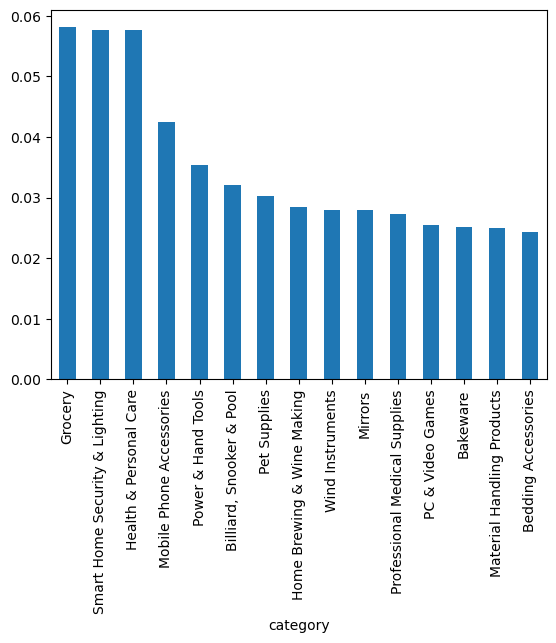

In [61]:
sorted_proportions.head(15).plot(kind="bar", stacked=True);
plt.show()

In [62]:
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

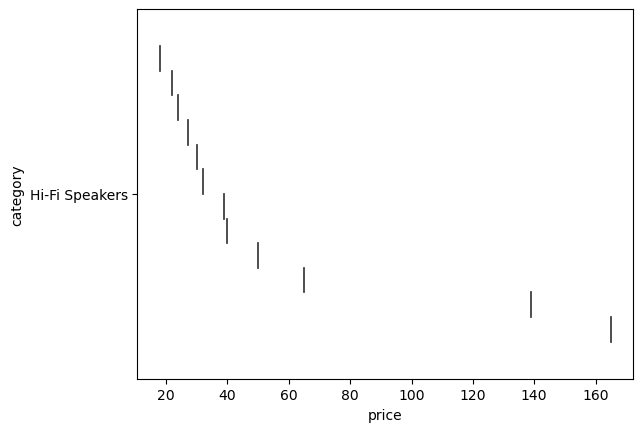

In [63]:
sns.violinplot(data=df.head(20), x='price', y='category', palette="coolwarm", hue='price', legend=False);
plt.show()

/var/folders/v5/qlyry0nx7f1_bbwxwy9t92sw0000gn/T/ipykernel_26616/2675209722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top20, x='price', y='category', palette='coolwarm', scale='width', inner='quartile')
/var/folders/v5/qlyry0nx7f1_bbwxwy9t92sw0000gn/T/ipykernel_26616/2675209722.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df_top20, x='price', y='category', palette='coolwarm', scale='width', inner='quartile')


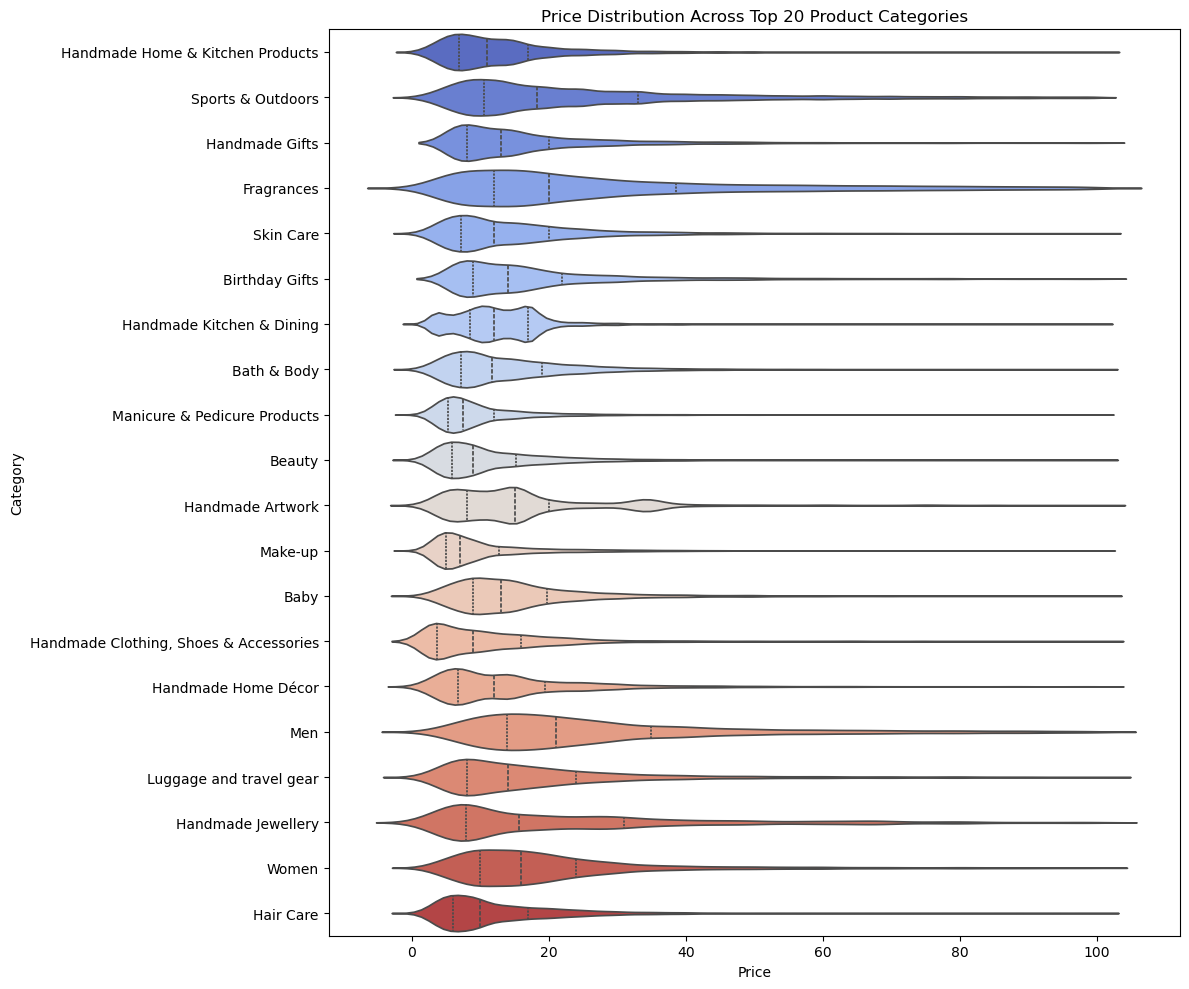

In [118]:
top20_categories = df_cleaned['category'].value_counts().head(20).index

df_top20 = df_cleaned[df_cleaned['category'].isin(top20_categories)]


plt.figure(figsize=(12, 10)) 
sns.violinplot(data=df_top20, x='price', y='category', palette='coolwarm', scale='width', inner='quartile')

plt.title("Price Distribution Across Top 20 Product Categories")
plt.xlabel("Price")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [120]:
print(df_cleaned.groupby('category')['price'].median().sort_values(ascending=False).head(10))

category
Desktop PCs               74.00
Boxing Shoes              69.79
Tablets                   69.00
Graphics Cards            68.54
Motherboards              67.92
Made in Italy Handmade    64.00
Digital Frames            63.90
Streaming Clients         62.68
Golf Shoes                62.39
Ski Helmets               61.33
Name: price, dtype: float64


In [66]:
# desktop PCs have the highest median price by a wide margin if price outliers are excldued

/var/folders/v5/qlyry0nx7f1_bbwxwy9t92sw0000gn/T/ipykernel_26616/666647620.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_category, x='category', y='price', palette="coolwarm")


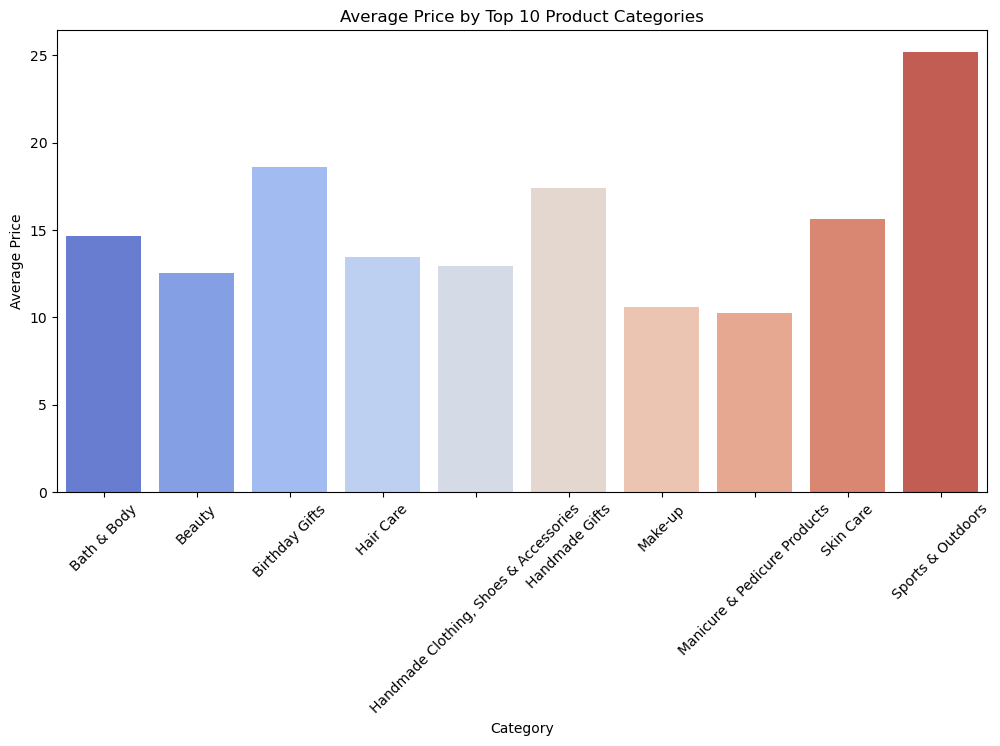

In [122]:
top10_categories = df_cleaned['category'].value_counts().head(10).index

df_top10 = df_cleaned[df_cleaned['category'].isin(top10_categories)]

avg_price_by_category = df_top10.groupby('category')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_category, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Price by Top 10 Product Categories")
plt.ylabel("Average Price")
plt.xlabel("Category")
plt.show()

In [124]:
print(df_cleaned.groupby('category')['price'].mean().sort_values(ascending=False))

category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64


In [80]:
# motherboards command the highest average price if outliers are exlcuded


/var/folders/v5/qlyry0nx7f1_bbwxwy9t92sw0000gn/T/ipykernel_26616/3854554735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='stars', y='category', palette='coolwarm')


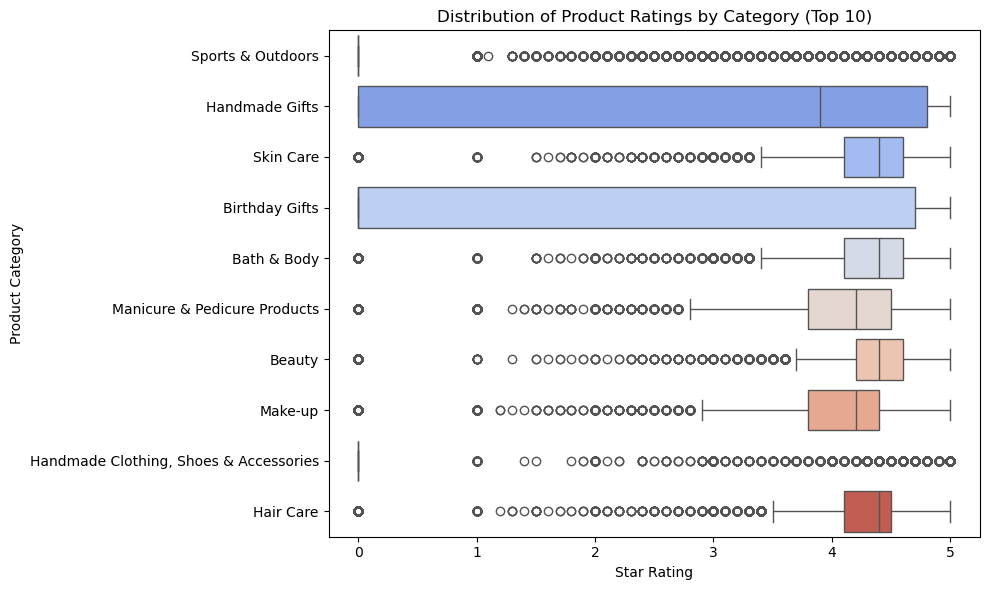

In [126]:
top10_categories = df_cleaned['category'].value_counts().head(10).index

df_top10 = df_cleaned[df_cleaned['category'].isin(top10_categories)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top10, x='stars', y='category', palette='coolwarm')
plt.title("Distribution of Product Ratings by Category (Top 10)")
plt.xlabel("Star Rating")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

In [129]:
print(df_cleaned.groupby('category')['stars'].median().sort_values(ascending=False))

category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
                               ... 
Hockey Shoes                    0.0
Hi-Fi Receivers & Separates     0.0
Handmade Kitchen & Dining       0.0
Handmade Jewellery              0.0
eBook Readers & Accessories     0.0
Name: stars, Length: 296, dtype: float64


In [ ]:
# computer memory has the highest median with 4.7. The others follow behind with hobbies...

In [ ]:
# Part III
# Part 3: Investigating the Interplay Between Product Prices and Ratings
# Objective: Analyze how product ratings (stars) correlate with product prices.

In [131]:
correlation = df_cleaned['price'].corr(df_cleaned['stars'])
correlation

-0.07767299878181444

In [ ]:
# there is a slight negative correlation. Weak relationship.

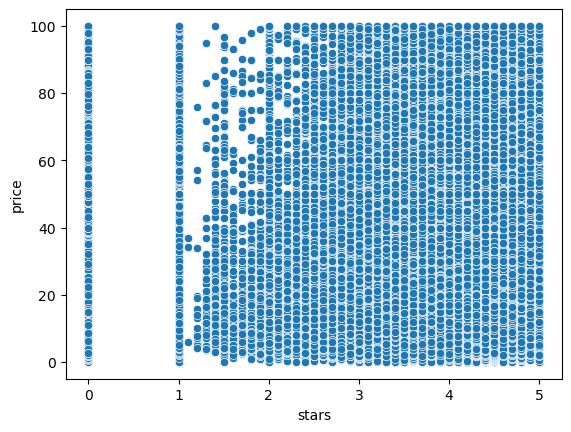

In [133]:
sns.scatterplot(data=df_cleaned, x='stars', y='price');
plt.show()

In [ ]:
# There is no product priced with stars between 0 and 1. Also between 1 and 2 its less but buidling up. No correaltion visible.

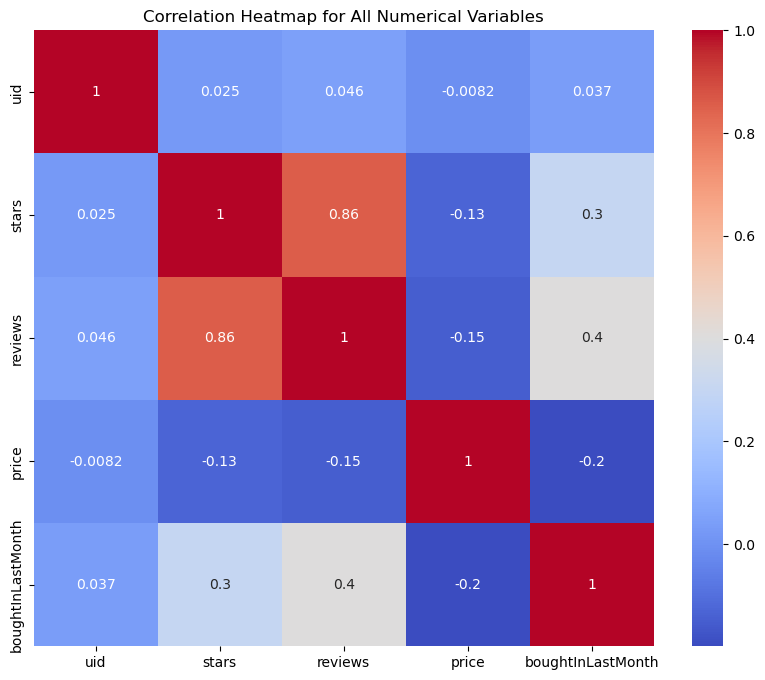

In [154]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]

df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

correlation_matrix = df_numerical.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for All Numerical Variables")
plt.show()

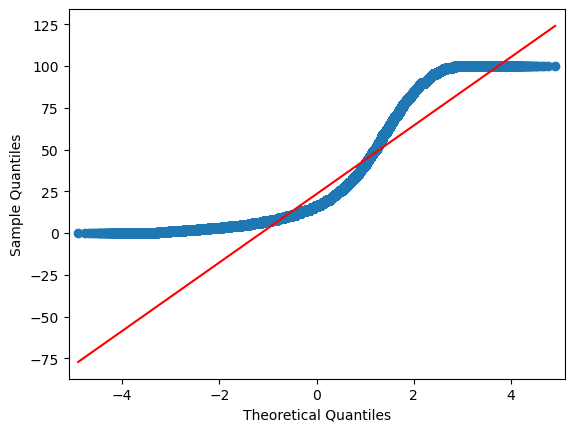

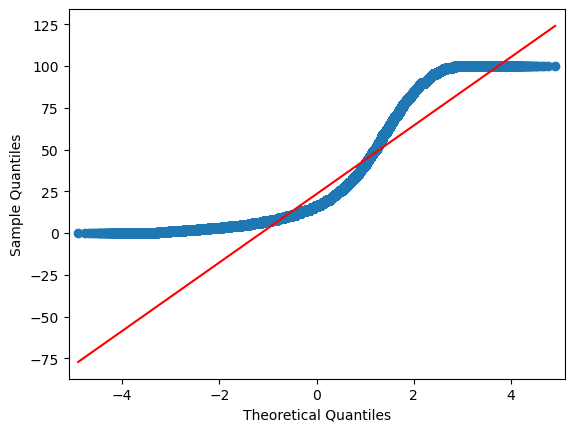

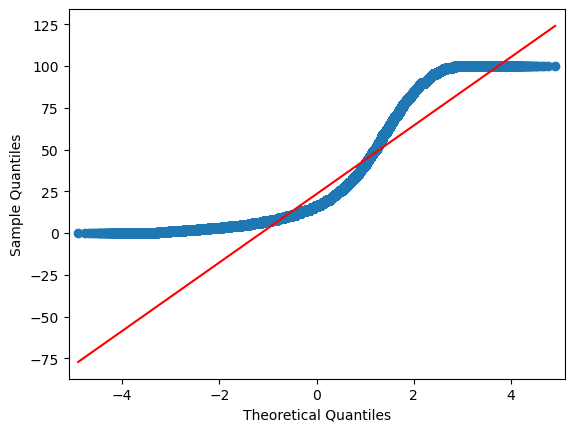

In [170]:
import statsmodels.api as sm

sm.qqplot(df_cleaned['price'], line='s');
plt.show()

In [ ]:
# It does not follow a normal distribution